In [126]:
from pycocotools.coco import COCO
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import pandas as pd
import yaml
%matplotlib inline

pd.options.display.max_rows = 100

In [79]:
DATAPATH = "/data/"
EVALPATH = "/data/eval/"
TRAINPATH = "/data/train/"

In [80]:
coco = COCO("../object_detection/train.json")
coco_eval = COCO("../object_detection/eval.json")

loading annotations into memory...
Done (t=0.22s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [139]:
# mapping of top species depth, shallow corresponds to < 800 m, source: google search
shallow_species =   {'shallow':
                        {
                        160: True,
                        37: False,
                        119: True,
                        51: True,
                        10: True,
                        146: False, # 1087m
                        52: False,
                        88: False,
                        125: False,
                        203: False, # 927m
                        214: True, # not much data
                        1: False,
                        259: True,
                        9: False, # 1000m
                        105: True,
                        211: False,
                        133: True,
                        142: False,
                        70: False,
                        260: True,
                        274: True,
                        174: False,
                        205: False, # not much data
                        120: False,
                        219: False, # not much data
                        81: False,
                        69: False,
                        104: True,
                        218: False,
                        16: False,
                        103: True,
                        224: False,
                        228: False,
                        242: False,
                        61: True, # mostly
                        116: True,
                        255: False,
                        202: False,
                        108: False, # unknown
                        11: False
                        }
                    }

In [217]:
# shallow_df = pd.DataFrame.from_dict(shallow_species).rename_axis('category_id').reset_index()
shallow_df = pd.read_json('../shallow_species.json')
shallow_df

,category_id,shallow
0,1,False
1,3,False
2,7,False
3,8,False
4,9,False
5,10,True
6,11,False
7,16,False
8,30,True
9,36,False


In [82]:
cat_df = pd.DataFrame.from_dict(coco.cats, orient='index')
# cat_df = cat_df.join(pd.Series(shallow_species, name='shallow_species'), on='id').dropna()
# cat_df = cat_df.reset_index(drop=True)
cat_df

,id,name,supercategory
1,1,Actiniaria,Anemone
2,2,Actinernus,Anemone
3,3,Actiniidae,Anemone
4,4,Actinoscyphia,Anemone
5,5,Bolocera,Anemone
...,...,...,...
286,286,Polychaeta,Worm
287,287,Polynoidae,Worm
288,288,Sabellidae,Worm
289,289,Serpulidae,Worm


In [83]:
cat_dict =  cat_df['name'].to_dict()

In [84]:
cat_dict

{1: 'Actiniaria',
 2: 'Actinernus',
 3: 'Actiniidae',
 4: 'Actinoscyphia',
 5: 'Bolocera',
 6: 'Dofleinia',
 7: 'Hormathiidae',
 8: 'Isosicyonis',
 9: 'Liponema brevicorne',
 10: 'Metridium farcimen',
 11: 'Actinopterygii',
 12: 'Agonidae',
 13: 'Albatrossia pectoralis',
 14: 'Alepocephalus tenebrosus',
 15: 'Anarrhichthys ocellatus',
 16: 'Anoplopoma fimbria',
 17: 'Antimora microlepis',
 18: 'Bathypterois',
 19: 'Bathysaurus mollis',
 20: 'Careproctus',
 21: 'Careproctus kamikawai',
 22: 'Careproctus melanurus',
 23: 'Careproctus ovigerus',
 24: 'Cataetyx',
 25: 'Chaunacops coloratus',
 26: 'Chilara taylori',
 27: 'Coryphaenoides',
 28: 'Gobiidae',
 29: 'Icelinus',
 30: 'Icelinus filamentosus',
 31: 'Lepidion',
 32: 'Liparidae',
 33: 'Lophiiformes',
 34: 'Luciobrotula',
 35: 'Lumpenus sagitta',
 36: 'Macrouridae',
 37: 'Merluccius productus',
 38: 'Moridae',
 39: 'Myctophidae',
 40: 'Nezumia liolepis',
 41: 'Nezumia stelgidolepis',
 42: 'Ophidiidae',
 43: 'Ophiodon elongatus',
 44: '

## Make dataset.yaml

In [85]:
dataset = {'path': '/data/dataset',
           'train': 'images/train',
           'val': 'images/val',
           'names': cat_dict}

In [86]:
with open("/data/dataset.yaml", 'w') as yamlfile:
    data = yaml.dump(dataset, yamlfile)
    print("Write successful")

Write successful


In [87]:
# cat_df['index'] = range(len(cat_df))
# map_dict = cat_df[['id', 'index']].to_dict()['id']
# map_dict = {value:key for key, value in map_dict.items()}
# map_dict

In [88]:
# cat_df[cat_df.shallow_species == True]['id'].to_list()

In [89]:
ann_df = pd.DataFrame.from_dict(coco.anns, orient='index')
# print(ann_df['image_id'].unique().__len__())
# ann_df = ann_df.join(pd.Series(shallow_species, name='shallow_species'), on='category_id').dropna()
# ann_df['original_category'] = ann_df['category_id']
# ann_df['category_id'] = ann_df['category_id'].map(map_dict)
ann_df


,id,image_id,category_id,segmentation,area,bbox,iscrowd
1,1,1,1.0,[],7869.0,"[347.0, 188.0, 129.0, 61.0]",0
2,2,2,1.0,[],8775.0,"[346.0, 191.0, 135.0, 65.0]",0
3,3,3,1.0,[],8768.0,"[343.0, 192.0, 137.0, 64.0]",0
4,4,4,88.0,[],315.0,"[623.0, 95.0, 21.0, 15.0]",0
5,5,4,1.0,[],440.0,"[361.0, 175.0, 22.0, 20.0]",0
...,...,...,...,...,...,...,...
23700,23700,5948,283.0,[],4360.0,"[698.0, 544.0, 40.0, 109.0]",0
23701,23701,5949,286.0,[],3792.0,"[532.0, 440.0, 48.0, 79.0]",0
23702,23702,5949,286.0,[],3484.0,"[609.0, 426.0, 52.0, 67.0]",0
23703,23703,5950,286.0,[],3216.0,"[148.0, 323.0, 48.0, 67.0]",0


In [90]:
# print(ann_df['image_id'].unique().__len__())
# remaining_images = pd.Series(ann_df['image_id'].unique(), name='id')
# remaining_images

In [91]:
train_img_df = pd.DataFrame.from_dict(coco.imgs, orient='index')
# train_img_df = train_img_df.merge(remaining_images, on=['id'])
train_img_df

,id,width,height,file_name,license,flickr_url,coco_url,date_captured
1,1,720,368,3b6f01ae-5bde-434d-9b06-79b269421ed6.png,0,https://fathomnet.org/static/m3/framegrabs/Tib...,https://fathomnet.org/static/m3/framegrabs/Tib...,2007-08-17 17:50:34
2,2,720,368,dce21f7c-20e5-482b-bd90-c038f8464c03.png,0,https://fathomnet.org/static/m3/framegrabs/Tib...,https://fathomnet.org/static/m3/framegrabs/Tib...,2007-08-17 17:50:38
3,3,720,368,4a7f2199-772d-486d-b8e2-b651246316b5.png,0,https://fathomnet.org/static/m3/framegrabs/Tib...,https://fathomnet.org/static/m3/framegrabs/Tib...,2007-08-17 17:50:44
4,4,720,368,3bddedf6-4ff8-4e81-876a-564d2b03b364.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2007-08-28 17:54:14
5,5,720,369,3f735021-f5de-4168-b139-74bf2859d12a.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2007-08-28 19:00:00
...,...,...,...,...,...,...,...,...
5946,5946,720,366,701715fe-b278-4310-ac1d-cca8ddacc830.png,0,https://fathomnet.org/static/m3/framegrabs/Doc...,https://fathomnet.org/static/m3/framegrabs/Doc...,2011-06-05 18:07:34
5947,5947,1920,1079,45e73fdd-d8a2-4ee1-abc7-3e34d2dfa82a.png,0,https://fathomnet.org/static/m3/framegrabs/Doc...,https://fathomnet.org/static/m3/framegrabs/Doc...,2011-06-05 18:22:23
5948,5948,1920,1080,676b982a-deeb-46ee-b47d-8a97a1b0c76c.png,0,https://fathomnet.org/static/m3/framegrabs/Doc...,https://fathomnet.org/static/m3/framegrabs/Doc...,2015-09-17 14:17:29
5949,5949,1920,1080,7e09c9a9-72e5-4374-9ed6-dae1ee2ea33d.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2012-11-19 21:12:58


In [92]:
eval_img_df = pd.DataFrame.from_dict(coco_eval.imgs, orient='index')
eval_img_df

,id,width,height,file_name,license,flickr_url,coco_url,date_captured
1,1,1920,1079,4172b65a-8b4f-4175-94e4-00187e2d5f33.png,0,https://fathomnet.org/static/m3/framegrabs/Min...,https://fathomnet.org/static/m3/framegrabs/Min...,2019-09-24 12:11:05
2,2,713,425,9d263fd4-f786-42bf-8e0c-2d5be7c81b49.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2007-08-15 18:44:36
3,3,720,368,c114ccb9-cf89-4d98-807b-f8636477c6ca.png,0,https://fathomnet.org/static/m3/framegrabs/Tib...,https://fathomnet.org/static/m3/framegrabs/Tib...,2007-09-08 14:41:18
4,4,718,365,95ba3acc-859b-4a99-8c30-b38a91a1be28.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2007-11-07 18:52:01
5,5,720,368,0c4bdb90-c715-4c01-81d1-aa7f49534ac7.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2007-12-06 20:00:00
...,...,...,...,...,...,...,...,...
10740,10740,1920,1080,8c6fbb81-eaeb-488e-9ca8-95d92a70505d.png,0,https://fathomnet.org/static/m3/staging/Doc%20...,https://fathomnet.org/static/m3/staging/Doc%20...,2013-12-12 00:00:00
10741,10741,720,486,f5d39dea-afb2-4ca7-b3a7-5ea35e038b98.png,0,https://fathomnet.org/static/m3/staging/Doc%20...,https://fathomnet.org/static/m3/staging/Doc%20...,2013-12-12 00:00:00
10742,10742,1920,1080,5833854d-3d75-4a25-b419-5e332d5ba931.png,0,https://fathomnet.org/static/m3/staging/Doc%20...,https://fathomnet.org/static/m3/staging/Doc%20...,2013-12-12 00:00:00
10743,10743,1920,1080,d6b50e1b-e12d-410e-ac65-437115d5b67a.png,0,https://fathomnet.org/static/m3/staging/Doc%20...,https://fathomnet.org/static/m3/staging/Doc%20...,2013-12-12 00:00:00


In [93]:
# cat_df.to_json('../category_key.json')
# ann_df.to_json('../annotation.json')
# train_img_df.to_json('../train_image_data.json')
# eval_img_df.to_json('../eval_image_data.json')
# shallow_df.to_json('../shallow_species.json')

## EDA goals
View statistics for:
- Images
  - total number of images
  - number of images by height/width
- Objects
  - Number of each type of category
  - Supercategory/category breakdown


In [94]:
def images_eda(image_df):
    n_total = len(image_df)
    dims = pd.Series(tuple(zip(image_df.width, image_df.height)))
    print(f'Total number of images in dataset: {n_total}')
    print('Top resolutions:')
    print(dims.value_counts().head(25))

# images_eda(train_img_df)


,category_id
1,False
9,False
10,True
11,False
16,False
37,False
51,True
52,False
61,True
69,False


In [219]:
def object_eda(annotation_df, categories_df, thresh=50):
    cat_count = annotation_df.category_id.value_counts().to_frame()
    df = categories_df.join(cat_count).sort_values('category_id', ascending=False).reset_index(drop=True)
    df = df.rename(columns={'id': 'category_id',
                              'name': 'category',
                              'supercategory': 'supercategory',
                              'category_id': 'cat_id_counts'})
    df = df[df.cat_id_counts > thresh]
    print(f'There are {len(df.dropna())} of 290 species present in the dataset.')
    print(f'There are {len(df.dropna().supercategory.unique())} of 20 semantic supercategories present.')
    return df

thresh_df = object_eda(ann_df, cat_df, 10)
shallow_counts = pd.merge(thresh_df, shallow_df, on=['category_id'], how='left')
# thresh_df


There are 65 of 290 species present in the dataset.
There are 16 of 20 semantic supercategories present.


In [220]:
shallow_counts.to_json('../shallow_counts.json')

In [168]:
def update_shallow(category_id, shallow, dictionary=shallow_species):
    dictionary['shallow'][category_id] = shallow
    return dictionary

In [214]:

shallow_species = shallow

In [211]:
shallow = update_shallow(30, True)
pd.DataFrame.from_dict(shallow).__len__()

65

In [166]:
shallow_species['shallow'][82] = True

In [ ]:
# mapping of top species depth, shallow corresponds to < 800 m, source: google search
shallow_species =   {'shallow':
                        {
                        160: True,
                        37: False,
                        119: True,
                        51: True,
                        10: True,
                        146: False, # 1087m
                        52: False,
                        88: False,
                        125: False,
                        203: False, # 927m
                        214: True, # not much data
                        1: False,
                        259: True,
                        9: False, # 1000m
                        105: True,
                        211: False,
                        133: True,
                        142: False,
                        70: False,
                        260: True,
                        274: True,
                        174: False,
                        205: False, # not much data
                        120: False,
                        219: False, # not much data
                        81: False,
                        69: False,
                        104: True,
                        218: False,
                        16: False,
                        103: True,
                        224: False,
                        228: False,
                        242: False,
                        61: True, # mostly
                        116: True,
                        255: False,
                        202: False,
                        108: False, # unknown
                        11: False,
                        82: 
                        }
                    }

In [96]:
def supercat_eda(annotation_df, categories_df):
    df = categories_df
    out = {}
    supermap = {i: list(df[df.supercategory == i].id.unique()) for i in df.supercategory.unique()}
    for i in supermap.keys():
        out[i] = 0
        for j in supermap[i]:
            out[i] += (len(annotation_df[annotation_df.category_id == j].image_id.unique()))    
    return out, supermap

supercat_eda(ann_df, cat_df)#.head(15)

({'Anemone': 656,
  'Fish': 1937,
  'Eel': 309,
  'Gastropod': 126,
  'Sea star': 1470,
  'Feather star': 172,
  'Sea cucumber': 486,
  'Urchin': 2647,
  'Glass sponge': 120,
  'Sea fan': 196,
  'Soft coral': 111,
  'Sea pen': 316,
  'Stony coral': 0,
  'Black coral': 0,
  'Crab': 77,
  'Shrimp': 253,
  'Squat lobster': 106,
  'Barnacle': 0,
  'Sea spider': 0,
  'Worm': 19},
 {'Anemone': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'Fish': [11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56],
  'Eel': [57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73],
  'Gastropod': [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87],
  'Sea star': [88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   9

## Search
Build search functions for:
- Images
  - list image ids with given category_id
  - show images with bbox
  - sort image lists by bbox size

In [121]:
ann_df2 = ann_df.rename(columns={'id': 'annotation_id'})
cat_df2 = cat_df.rename(columns={'id': "category_id"})
img_df2 = train_img_df.rename(columns={'id': 'image_id'})
all_df = pd.merge(ann_df2, cat_df2, on='category_id')
all_df = pd.merge(all_df, img_df2, on='image_id')

all_df

,annotation_id,image_id,category_id,segmentation,area,bbox,iscrowd,name,supercategory,width,height,file_name,license,flickr_url,coco_url,date_captured
0,1,1,1.0,[],7869.0,"[347.0, 188.0, 129.0, 61.0]",0,Actiniaria,Anemone,720,368,3b6f01ae-5bde-434d-9b06-79b269421ed6.png,0,https://fathomnet.org/static/m3/framegrabs/Tib...,https://fathomnet.org/static/m3/framegrabs/Tib...,2007-08-17 17:50:34
1,2,2,1.0,[],8775.0,"[346.0, 191.0, 135.0, 65.0]",0,Actiniaria,Anemone,720,368,dce21f7c-20e5-482b-bd90-c038f8464c03.png,0,https://fathomnet.org/static/m3/framegrabs/Tib...,https://fathomnet.org/static/m3/framegrabs/Tib...,2007-08-17 17:50:38
2,3,3,1.0,[],8768.0,"[343.0, 192.0, 137.0, 64.0]",0,Actiniaria,Anemone,720,368,4a7f2199-772d-486d-b8e2-b651246316b5.png,0,https://fathomnet.org/static/m3/framegrabs/Tib...,https://fathomnet.org/static/m3/framegrabs/Tib...,2007-08-17 17:50:44
3,5,4,1.0,[],440.0,"[361.0, 175.0, 22.0, 20.0]",0,Actiniaria,Anemone,720,368,3bddedf6-4ff8-4e81-876a-564d2b03b364.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2007-08-28 17:54:14
4,4,4,88.0,[],315.0,"[623.0, 95.0, 21.0, 15.0]",0,Asteroidea,Sea star,720,368,3bddedf6-4ff8-4e81-876a-564d2b03b364.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2007-08-28 17:54:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23699,23657,5938,274.0,[],47498.0,"[814.0, 439.0, 254.0, 187.0]",0,Pleuroncodes planipes,Squat lobster,1920,1079,0ee6cc62-7d43-47b2-9ad6-14e1255bd412.png,0,https://fathomnet.org/static/m3/framegrabs/Min...,https://fathomnet.org/static/m3/framegrabs/Min...,2019-11-04 18:33:52
23700,23701,5949,286.0,[],3792.0,"[532.0, 440.0, 48.0, 79.0]",0,Polychaeta,Worm,1920,1080,7e09c9a9-72e5-4374-9ed6-dae1ee2ea33d.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2012-11-19 21:12:58
23701,23702,5949,286.0,[],3484.0,"[609.0, 426.0, 52.0, 67.0]",0,Polychaeta,Worm,1920,1080,7e09c9a9-72e5-4374-9ed6-dae1ee2ea33d.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2012-11-19 21:12:58
23702,23703,5950,286.0,[],3216.0,"[148.0, 323.0, 48.0, 67.0]",0,Polychaeta,Worm,1920,1080,06acea78-c8b5-48fe-8678-cb24458ebc6a.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2012-11-19 21:13:02


In [98]:
# all_df = all_df.join(pd.Series(shallow_species, name='shallow_species'), on='category_id').dropna()
# all_df

,annotation_id,image_id,category_id,segmentation,area,bbox,iscrowd,name,supercategory,width,height,file_name,license,flickr_url,coco_url,date_captured,shallow_species
0,1,1,1.0,[],7869.0,"[347.0, 188.0, 129.0, 61.0]",0,Actiniaria,Anemone,720,368,3b6f01ae-5bde-434d-9b06-79b269421ed6.png,0,https://fathomnet.org/static/m3/framegrabs/Tib...,https://fathomnet.org/static/m3/framegrabs/Tib...,2007-08-17 17:50:34,False
1,2,2,1.0,[],8775.0,"[346.0, 191.0, 135.0, 65.0]",0,Actiniaria,Anemone,720,368,dce21f7c-20e5-482b-bd90-c038f8464c03.png,0,https://fathomnet.org/static/m3/framegrabs/Tib...,https://fathomnet.org/static/m3/framegrabs/Tib...,2007-08-17 17:50:38,False
2,3,3,1.0,[],8768.0,"[343.0, 192.0, 137.0, 64.0]",0,Actiniaria,Anemone,720,368,4a7f2199-772d-486d-b8e2-b651246316b5.png,0,https://fathomnet.org/static/m3/framegrabs/Tib...,https://fathomnet.org/static/m3/framegrabs/Tib...,2007-08-17 17:50:44,False
3,5,4,1.0,[],440.0,"[361.0, 175.0, 22.0, 20.0]",0,Actiniaria,Anemone,720,368,3bddedf6-4ff8-4e81-876a-564d2b03b364.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2007-08-28 17:54:14,False
4,4,4,88.0,[],315.0,"[623.0, 95.0, 21.0, 15.0]",0,Asteroidea,Sea star,720,368,3bddedf6-4ff8-4e81-876a-564d2b03b364.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2007-08-28 17:54:14,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23695,23653,5934,274.0,[],45828.0,"[1040.0, 374.0, 228.0, 201.0]",0,Pleuroncodes planipes,Squat lobster,1920,1079,b47b5e6e-189c-4129-8bde-952d9ed349ac.png,0,https://fathomnet.org/static/m3/framegrabs/Min...,https://fathomnet.org/static/m3/framegrabs/Min...,2019-11-04 18:30:23,True
23696,23654,5935,274.0,[],370740.0,"[592.0, 215.0, 668.0, 555.0]",0,Pleuroncodes planipes,Squat lobster,1920,1079,999c848a-656d-46eb-926f-fb83380db979.png,0,https://fathomnet.org/static/m3/framegrabs/Min...,https://fathomnet.org/static/m3/framegrabs/Min...,2019-11-04 18:30:36,True
23697,23655,5936,274.0,[],561446.0,"[713.0, 380.0, 809.0, 694.0]",0,Pleuroncodes planipes,Squat lobster,1920,1079,41cdc9a5-b5c1-4472-bbf0-1564426328fb.png,0,https://fathomnet.org/static/m3/framegrabs/Min...,https://fathomnet.org/static/m3/framegrabs/Min...,2019-11-04 18:30:53,True
23698,23656,5937,274.0,[],652620.0,"[592.0, 215.0, 876.0, 745.0]",0,Pleuroncodes planipes,Squat lobster,1920,1079,b073a77c-c495-4da8-b275-3f2216885817.png,0,https://fathomnet.org/static/m3/framegrabs/Min...,https://fathomnet.org/static/m3/framegrabs/Min...,2019-11-04 18:31:02,True


In [99]:
all_df.image_id.unique().__len__() / 5950

0.9789915966386554

In [100]:
def images_by_cat(df, category_id):
    # print(f'{cat_df.loc[category_id]}')
    img_list = df[df['category_id'] == category_id].image_id.unique()
    print(f'\nFound {len(img_list)} images')
    return list(img_list)

In [101]:
def get_image_with_annotation(img_id, img_df=train_img_df, category_id=None):
    row = img_df[img_df.id == img_id]
    filename = row.file_name[img_id]
    anns = ann_df[ann_df.image_id == img_id]
    if category_id != None:
        anns = anns[anns.category_id == category_id]
    print(filename)
    return filename, anns

In [102]:
def show_image(img_id, category_id=None, img_df=train_img_df):
    filename, anns = get_image_with_annotation(img_id, img_df)
    img_path = TRAINPATH + filename
    img = mpimg.imread(img_path)
    
    _, ax = plt.subplots()
    ax.imshow(img)
    for _, ann in anns.iterrows():
        x, y, width, height = ann['bbox']
        if category_id == ann.category_id:
            rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        else:
            rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='b', facecolor='none')
        ax.add_patch(rect)
    plt.show()

In [103]:
def show_image_by_category(df, category_id):
    img_list = images_by_cat(df, category_id)
    for image in img_list:
        show_image(image, category_id)

In [117]:
_ = images_by_cat(all_df, 206)


Found 0 images


In [116]:
_, anns = get_image_with_annotation(1)
anns

3b6f01ae-5bde-434d-9b06-79b269421ed6.png


,id,image_id,category_id,segmentation,area,bbox,iscrowd
1,1,1,1.0,[],7869.0,"[347.0, 188.0, 129.0, 61.0]",0


In [106]:
# show_image(717, 26)


Found 1 images
55c08572-313d-4d39-a83d-38af76626ec4.png


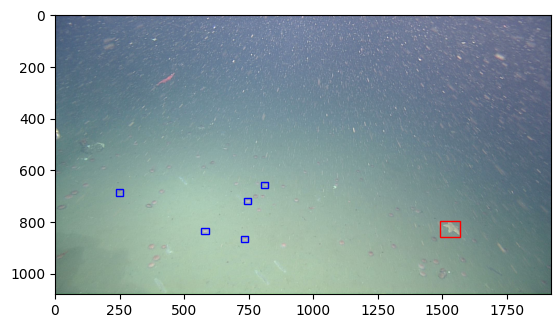

In [122]:
show_image_by_category(all_df, 101)

In [108]:
# all_df.to_json(DATAPATH + 'y_clean.json')

## Submission

In [110]:
# import glob
# import os

# def remap(cat_lst, mapper, shallow):
#     cat_df[cat_df.shallow_species == True]['index'].to_list()
#     out = []
#     osd = 0.9 # set for base case that there are objects found
#     for i in cat_lst:
#         osd = 0.5
#         if i in shallow:
#             osd = 0.1 # update if shallow species present
#         out.append(str(mapper.get(i)))
#     return out, osd


# out = {}
# filelist = glob.glob('../runs/detect/predict/labels/*.txt')
# # filelist = glob.glob('test*.txt')
# shallow = cat_df[cat_df.shallow_species == True]['index'].to_list()
# mapper = cat_df[['id', 'index']].to_dict()['id']

# for i, file in enumerate(filelist):
#     with open(file, 'r') as f:
#         cats = []

#         for line in f.readlines():
#             cats.append(int(line.split(' ')[0]))

#         cats, osd = remap(cats, mapper, shallow)
#         cats = ' '.join(cats)
#         if len(cats) == 0:
#             cats = '160'

#     out[i] = {'id': os.path.basename(file)[:-4], 'categories': cats, 'osd': osd}

# df = pd.DataFrame.from_dict(out, orient='index')
# df[['id', 'categories', 'osd']].to_csv('submission_1.csv', index=False)